Hi everyone! `Chelsae` and `Manchester City` are in the **UCL Final**. Let's predict who is most likely to lift the Trophy.

In [1]:
#Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset and assigning it to variable df. 

df = pd.read_csv('ucl_stats.csv')

In [3]:
df.head()

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


In [4]:
df.tail()

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
715,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
716,2020,Valencia,8,3,2,3,13,15,-2,11,0
717,2020,Chelsea,8,3,2,3,12,16,-4,11,0
718,2020,Ajax,6,3,1,2,12,6,6,10,0
719,2020,Lille,6,0,1,5,4,14,-10,1,0


In [5]:
df.shape

(720, 11)

In [6]:
#Checking if there is any null value in the dataset.

df.isna().sum()

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

`Great news!` We don't have any null values in our dataset

In [7]:
#Let's check a quick info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            720 non-null    int64 
 1   team            720 non-null    object
 2   match_played    720 non-null    int64 
 3   wins            720 non-null    int64 
 4   draws           720 non-null    int64 
 5   losts           720 non-null    int64 
 6   goals_scored    720 non-null    int64 
 7   goals_conceded  720 non-null    int64 
 8   gd              720 non-null    int64 
 9   group_point     720 non-null    int64 
 10  champions       720 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 62.0+ KB


In [8]:
df.describe()

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2008.688889,7.659722,2.920833,1.830556,2.911111,10.522222,10.490278,0.091667,8.133333,0.040278
std,7.351526,2.097628,2.316563,1.277454,1.248259,6.982757,3.669961,7.645660,4.213562,0.196747
min,1993.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-22.000000,-8.000000,0.000000
25%,2004.000000,6.000000,1.000000,1.000000,2.000000,5.000000,8.000000,-5.000000,5.000000,0.000000
50%,2009.000000,6.000000,2.000000,2.000000,3.000000,9.000000,10.000000,0.000000,8.000000,0.000000
75%,2015.000000,8.000000,4.000000,3.000000,4.000000,14.000000,13.000000,5.000000,11.000000,0.000000
max,2020.000000,13.000000,11.000000,7.000000,6.000000,43.000000,24.000000,35.000000,18.000000,1.000000


Let's find the `correlation` of independent variables

In [9]:
#Getting the correlation
df.corr()

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
year,1.000000,0.061851,0.051881,-0.075819,0.078825,0.119509,0.218461,0.004690,0.050327,-0.048058
match_played,0.061851,1.000000,0.882300,0.359944,-0.338240,0.833031,0.035613,0.737434,0.702558,0.403960
wins,0.051881,0.882300,1.000000,0.120946,-0.497360,0.882312,-0.148224,0.868512,0.865699,0.412861
draws,-0.075819,0.359944,0.120946,1.000000,-0.632216,0.221984,-0.197930,0.295649,0.224610,0.148934
losts,0.078825,-0.338240,-0.497360,-0.632216,1.000000,-0.470811,0.535669,-0.680145,-0.657506,-0.262897
goals_scored,0.119509,0.833031,0.882312,0.221984,-0.470811,1.000000,0.060061,0.872680,0.766493,0.404800
goals_conceded,0.218461,0.035613,-0.148224,-0.197930,0.535669,0.060061,1.000000,-0.407113,-0.297263,-0.058206
gd,0.004690,0.737434,0.868512,0.295649,-0.680145,0.872680,-0.407113,1.000000,0.832935,0.397889
group_point,0.050327,0.702558,0.865699,0.224610,-0.657506,0.766493,-0.297263,0.832935,1.000000,0.216647
champions,-0.048058,0.403960,0.412861,0.148934,-0.262897,0.404800,-0.058206,0.397889,0.216647,1.000000


Let's visualize this to get better intuition.

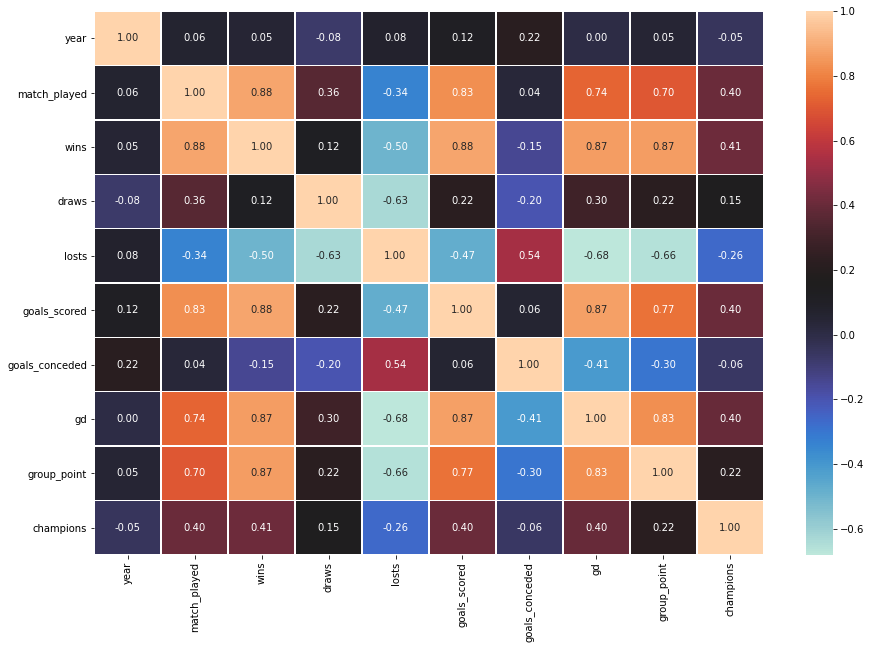

In [10]:
#Visualizing correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="icefire");

**Much better!**










Let's check the `champions` column and see the `sum` of two different values.

In [11]:
df.champions.value_counts()

0    691
1     29
Name: champions, dtype: int64

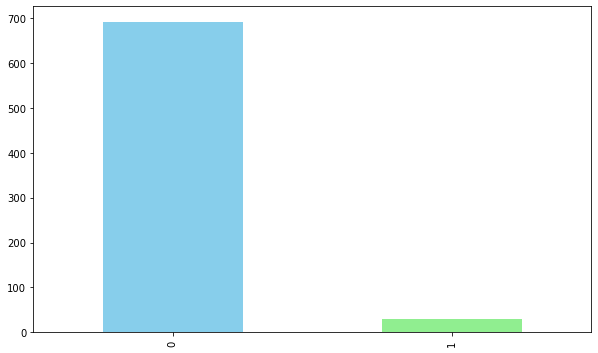

In [12]:
#Visualizing those values
df.champions.value_counts().plot(kind="bar", figsize = (10, 6), color=["skyblue", "lightgreen"]);

So we clearly have `Imbalance Distribution` is our Data.

We have to fixed this or we will end up with a very bad model which will barely identify the winners.

Now we have to make `independent and dependent matrix of feature` from our dataset

`x` will be our independent matix of feature and `y` will be dependent matrix of feature.

In [13]:
#creating x and y matrix of features

x = df.iloc[:, 2: -1]
y = df.iloc[:, -1]

In [14]:
#checking x

x.head()

,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point
0,6,3,3,0,14,4,10,9
1,7,6,0,1,11,2,9,12
2,6,2,4,0,7,5,2,8
3,6,2,1,3,5,8,-3,5
4,6,0,2,4,2,11,-9,2


We got what we want. We don't want the `team` column becuse when we ecode the team column we will end up with a dataset has lots of columns. We don't want that.

Now we need to apply `over_sampling` to equalize number of rows with `0` and number of rows with `1`. This way we will end up with a far better mode and accuracy.

In [15]:
#imporing SMOTE class from imblearn.over_sampling

from imblearn.over_sampling import SMOTE

#Instanciating a object of SMOTE Class
smote = SMOTE()

# fit predictor and target variables
x_smote, y_smote = smote.fit_resample(x, y)

Now we have two new matrix of features. They will have more then the main matrix of features because we applied `over_sampling` on them.

Let's check

In [16]:
#shape of x_smote
x_smote.shape

(1382, 8)

In [17]:
#shape of y_smote
y_smote.shape

(1382,)

Now, let's plot there values and see what really happend

<AxesSubplot:>

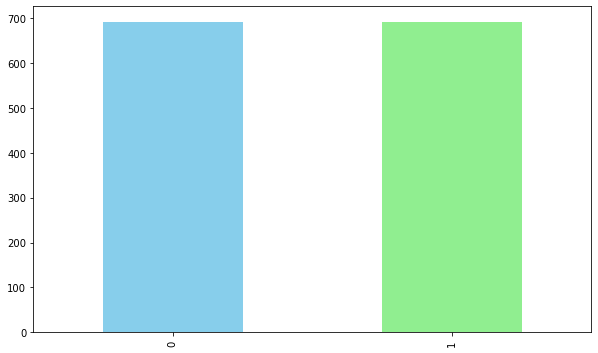

In [18]:
y_smote.value_counts().plot(kind="bar", figsize = (10, 6), color=["skyblue", "lightgreen"])

# Boom!

We `sloved` the `imbalance distribution` problem

# It's time to apply Machine Learning

Let's split our dataset into `train` and `test` set first

In [20]:
from sklearn.model_selection import train_test_split

#defining a random seed to make the split reproducable
np.random.seed(37)

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25)

In [21]:
#checking the lenth of each set
len(x_train), len(x_test), len(y_train), len(y_test)

(1036, 346, 1036, 346)

Let's check thos set one by one

In [22]:
x_train.head()

,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point
1229,11,8,1,1,22,9,13,15
775,7,4,3,0,15,4,11,9
272,12,7,3,2,19,10,9,13
741,13,4,3,2,19,10,9,10
1322,10,4,4,1,9,6,3,11


In [23]:
y_train.head()

1229    1
775     1
272     0
741     1
1322    1
Name: champions, dtype: int64

In [24]:
x_test.head()

,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point
512,12,6,2,4,19,10,9,12
466,6,1,2,3,6,10,-4,5
813,13,4,3,2,19,9,9,9
1320,11,9,1,0,22,9,13,13
697,9,4,1,4,17,18,-1,7


In [25]:
y_test.head()

512     0
466     0
813     1
1320    1
697     0
Name: champions, dtype: int64

I have applied different Machine Learning model on this dataset. `RandomForestClassifier` worked **best**. So we are going to use this.

In [26]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

We need to import `RandomizedSearchCV` to tune the hyperparameters.

In [27]:
#importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
#defining some values to perform RandomSearch

rscv_grid = {"n_estimators": np.arange(10, 1000, 20),
           "max_depth": [None, 3, 5, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [29]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rscv_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rscv_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fit random hyperparameter search model
rscv_clf.fit(x_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


# Great!

We have trained our model with best parameteres found by `RandomizedSearchCV`.

Let's check the best parameters.

In [30]:
rscv_clf.best_params_

{'n_estimators': 790,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': None}

# It's time to check the score

In [31]:
rscv_clf.score(x_test, y_test)

0.9710982658959537

# Boom!

We got **97.12%** `Accuracy`

Now let's see how our model is doing by testing it on `test set`.

In [32]:
y_preds = rscv_clf.predict(x_test)

Let's see the `result`

In [33]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,160,8
1,2,176


# WOW!!

How good is that!

Now, Let's see the `classification_report`

In [34]:
#Importing classification_report
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       168
           1       0.96      0.99      0.97       178

    accuracy                           0.97       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.97      0.97      0.97       346



We got some real good number here...

Now let's plot `ROC` curve

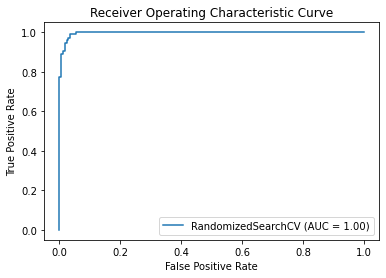

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rscv_clf, x_test, y_test);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

Now it's time to check weather our model is `overfitted` or not!

We need to evaluate our model on new data and need to check how it's doing!

Let's check it on the data of some teams who already lost and no chance of winning the title.

Now check for `Real Madrid` who lost in the **Semi-Final**

In [40]:
print(rscv_clf.predict_proba(np.array([[12, 6, 3, 3, 19, 14, +5, 10]])))

[[0.43442584 0.56557416]]


`Real Madrid` has **57%** of `winning` and **43%** of `lossing` the championship.

They played in **Semi-Final**. So the prediction is **reasonable**.

Let's check for `Bercelona`.

In [43]:
print(rscv_clf.predict_proba(np.array([[8, 5, 1, 2, 18, 10, +8, 15]])))

[[0.97353315 0.02646685]]


`Bercelona` has **2.6%** chance of `winning` and **97.4%** of `lossing`. 

They lost in `Round of 16`. So the **prediction is correct**.

Let's check for `MnU` who lost in the `Group Stage`.

In [44]:
print(rscv_clf.predict_proba(np.array([[6, 3,  0, 3, 15, 10, +5, 9]])))

[[0.98448312 0.01551688]]


`MnU` has **1.5%** chance of `winning` and **98.5%** of `lossing`. 


# Our Model is predicting Incredible.

There is no chance of `overfitting`.

# Now let's see the states of `ManCity` and `Chelsea`

# `ManCity` Stats this seasone.

`match_played` --> 12

`wins` --> 11

`draws` --> 1

`losts` --> 0

`goals_scored` --> 25

`goals_conceded` --> 4

`goals_difference` -->21

`group_points` --> 16

#  `Chelsea` Stats this seasone.

`match_played` --> 12

`wins` --> 8

`draws` --> 3

`losts` --> 1

`goals_scored` --> 22

`goals_conceded` --> 4

`goals_difference` -->18

`group_points` --> 14

In [45]:
man_city_prediction = rscv_clf.predict_proba(np.array([[12, 11,  1, 0, 25, 4, +21, 16]]))

In [48]:
print("ManCity has {0:.2f}% chance of Winning and {1:.2f}% chance of Lossing.".format(100*man_city_prediction[0, 1], 100*man_city_prediction[0, 0]))

ManCity has 91.00% chance of Winning and 9.00% chance of Lossing.


In [49]:
chelsea_prediction = rscv_clf.predict_proba(np.array([[12, 8,  3, 1, 22, 4, +18, 14]]))

In [50]:
print("Chelsea has {0:.2f}% chance of Winning and {1:.2f}% chance of Lossing.".format(100*chelsea_prediction[0, 1], 100*chelsea_prediction[0, 0]))

Chelsea has 80.77% chance of Winning and 19.23% chance of Lossing.


# `ManCity` has `10.23%` more chance of winning the `UCL` this season(2020-2021)